In [18]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.optimize import curve_fit

# About this file

This contains a couple of datasets that show up in pchem lab which highlight skills you might want. It's a bit of a hodgepodge. Some things I do in this file:
1. Import a bunch of datafiles at once
2. Fit a single dataset to two Gaussians, chopping off part of the region of interest
3. A residual plot
4. Someone asked for how to look at the difference between two spectra, so that's here
5. Finding peaks in a dataset

## Importing data

opening 120s031320.txt
opening 150s031320.txt
opening 180s031320.txt
opening 20s031320.txt
opening 30s031320.txt
opening 40s031320.txt
opening 50s031320.txt
opening 60s031320.txt
opening 90s031320.txt
opening long031320.txt


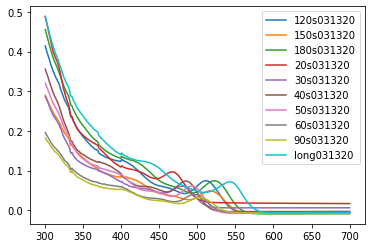

In [19]:
p = Path("UV-Vis Data")
filelist = list(p.glob('*.txt'))

textnames = np.array([])
uvvisX = np.empty([400,1])
uvvisY = np.empty([400,1])
for i in filelist:
    print("opening " + i.name)
    textnames = np.append(textnames, i.stem)
    filename=p/i.name
    datax, datay = np.loadtxt(filename, skiprows=19, max_rows=400, unpack = True)
    uvvisX = np.hstack((uvvisX, np.reshape(datax, (-1, 1))))
    uvvisY = np.hstack((uvvisY, np.reshape(datay, (-1, 1))))

uvvisX = uvvisX[:,1:]
uvvisY = uvvisY[:,1:]


plt.plot(uvvisX, uvvisY)
plt.legend(textnames)

## Definiting fit functions

In [20]:
def twogauss(x, h1, h2, c1, c2, s1, s2, b):
    """ Returns multiple Gaussians summed on the x axis.
    heights, centers, stdevs should be 1xn arrays.
    Gaussians are of the form
    y = height * np.exp((center - x)**2/(2*stdev**2))
    b is a vertical offset"""
    g1 = gauss(x, h1, c1, s1)
    g2 = gauss(x, h2, c2, s2)
    return g1 + g2 + b

def gauss(x, height, center, stdev):
    return height*np.exp(-(center-x)**2/(2*stdev**2))

## Fitting UV data and exploring it

This chunk of code fits one dataset to two Gaussians.

[ 5.89842096e-02  1.87859134e-01  5.13091664e+02  3.17787850e+02
  1.41725534e+01  9.65166023e+01 -8.54852875e-03]


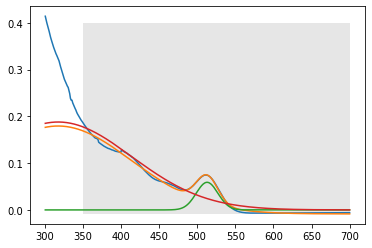

In [21]:
p0=(.05, .2, 500, 300, 5, 100, 0)
popt, pcov = curve_fit(twogauss, uvvisX[:350,0], uvvisY[:350,0], p0=p0)
print(popt)
plt.plot(uvvisX[:,0], uvvisY[:,0])
plt.plot(uvvisX[:,0], twogauss(uvvisX[:,0], *popt))
plt.fill((350,350,700,700), (popt[6],.4, .4, popt[6]), facecolor=(.9,.9,.9))
plt.plot(uvvisX[:,0], gauss(uvvisX[:,0], popt[0], popt[2], popt[4]))
plt.plot(uvvisX[:,0], gauss(uvvisX[:,0], popt[1], popt[3], popt[5]))
plt.savefig("fit with shading.png")

Let's look at the residuals here. I added in the shading to show the region fit. Students have proven to me that you can fit the entire region with basically no residual function if you do a four Gauss fit, but I'm not going to bother with that today.

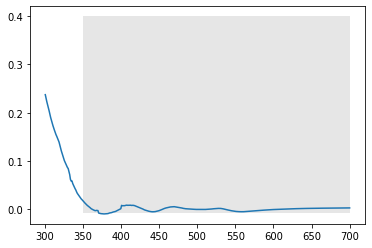

In [7]:
plt.plot(uvvisX[:,0], uvvisY[:,0] - twogauss(uvvisX[:,0], *popt))
plt.fill((350,350,700,700), (popt[6],.4, .4, popt[6]), facecolor=(.9,.9,.9))

## Challenge:

I fit one dataset. Can you fit all of the loaded datasets by iterating over a list? I have a partial solution at the end of this file, but it's having fit problems and I wanted to eat so I stopped working at it.


### Looking at the difference between two spectra

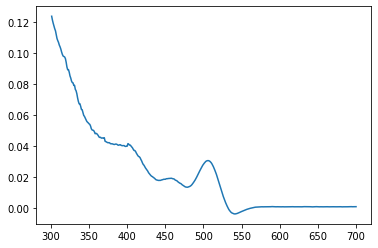

In [10]:
plt.plot(uvvisX[:,0], uvvisY[:,0] - uvvisY[:,1])

# Peak finding

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

Let's find all the peaks in the vibronic spectrum of iodine. First I'm going to load in the blank and dataset, unpacking them into columns, and calculate the absorbance from the raw data.

In [4]:
from scipy.signal import find_peaks


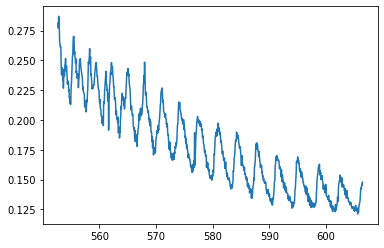

In [7]:
data4X, data4N, data4Y = np.loadtxt("data_from_Chris/CC I2 1200 blaze 580 center_1.txt", unpack=True)
blank4X, blank4N, blank4Y = np.loadtxt("data_from_Chris/CC White light 1200 blaze 580 center_1.txt", unpack=True)
abs4 = np.log10(blank4Y/data4Y)
plt.plot(data4X, abs4)

So many peaks! Let's fine them!

In [8]:
find_peaks(abs4)

(array([  2,   8,  13,  16,  19,  24,  27,  32,  35,  37,  39,  50,  53,
         57,  59,  64,  69,  71,  80,  87,  92,  97, 101, 104, 106, 110,
        114, 120, 122, 126, 134, 139, 142, 144, 146, 153, 158, 161, 163,
        168, 171, 174, 179, 183, 187, 190, 192, 196, 198, 202, 206, 208,
        210, 212, 216, 221, 224, 227, 236, 240, 245, 247, 249, 251, 253,
        255, 261, 265, 276, 278, 283, 287, 290, 293, 295, 297, 300, 303,
        306, 309, 312, 318, 320, 322, 335, 338, 346, 350, 352, 355, 358,
        360, 366, 370, 372, 375, 378, 380, 389, 392, 400, 403, 405, 407,
        411, 413, 416, 421, 425, 430, 434, 436, 439, 441, 451, 455, 457,
        459, 463, 465, 468, 475, 478, 481, 484, 486, 488, 492, 495, 499,
        502, 505, 512, 514, 518, 522, 524, 528, 533, 539, 541, 543, 548,
        552, 554, 559, 563, 568, 576, 579, 581, 584, 590, 597, 599, 602,
        605, 608, 610, 613, 616, 618, 621, 623, 627, 629, 636, 644, 646,
        648, 653, 659, 661, 664, 666, 669, 673, 675

This foudn every local maximum in the dataset, which is a lot of peaks. Let's find just the bigger ones. There are a lot of options (remember, type `help(find_peaks)` to see the docs). I'm going to use `prominence`, which is how much a peak rises above it's surroundings.

I'm also going to get fancy. I'll store the index values for each peak in an array. I'll use that array to find the wavelength of the peak locations, Then I'll plot a line through each found peak, and print out how many peaks I found.

Number of peaks found:  22


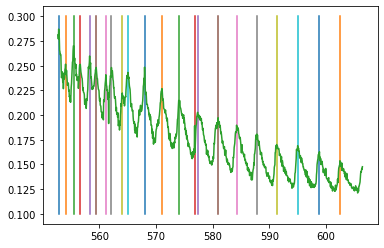

In [15]:
peakValues, props = find_peaks(abs4, prominence = (.01))
peakLocations = data4X[peakValues]
plt.plot((peakLocations, peakLocations), (.1,.3))
plt.plot(data4X, abs4)
print("Number of peaks found: ", len(peakLocations))

In [16]:
peakLocations

array([552.848, 554.065, 555.501, 556.66 , 558.312, 559.467, 561.169,
       562.156, 564.071, 565.055, 567.999, 571.096, 574.02 , 576.827,
       577.365, 580.966, 584.231, 587.803, 591.306, 595.006, 598.847,
       602.461])

# Partial solution to multiple fits


Parameters for spectrum0 are [ 5.89843426e-02  1.87858244e-01  5.13091675e+02  3.17789040e+02
  1.41726210e+01  9.65158560e+01 -8.54845133e-03]
Parameters for spectrum1 are [ 4.04908154e-02  1.39755191e-01  5.19073554e+02  3.07426003e+02
  1.40479551e+01  1.04660537e+02 -9.05883771e-03]
Parameters for spectrum2 are [ 5.83432717e-02  2.34786656e-01  5.24273126e+02  2.92250000e+02
  1.41053516e+01  1.14426139e+02 -1.26553951e-02]


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1600.

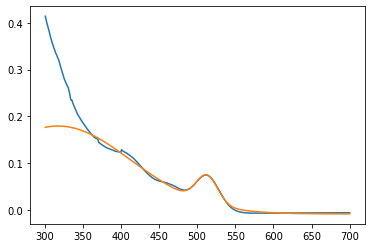

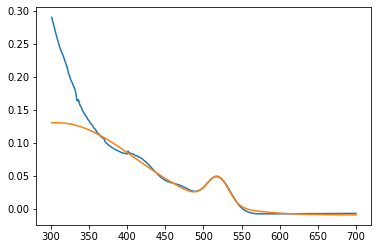

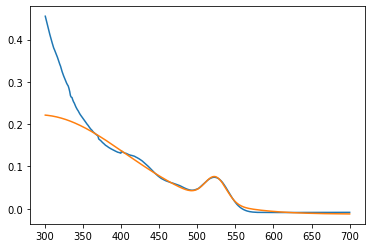

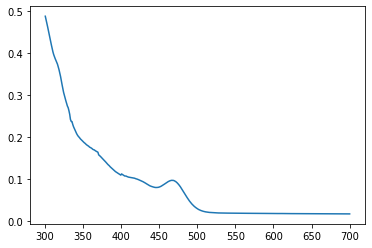

In [45]:
numspec = np.shape(uvvisX)[1]
startIndex = 350

for i in range(numspec):
    plt.figure(i)
    plt.plot(uvvisX[:,i], uvvisY[:,i])
    popt, pcov = curve_fit(twogauss, uvvisX[:startIndex,i], uvvisY[:startIndex,i], p0=p0)
    plt.plot(uvvisX[:,i], twogauss(uvvisX[:,i], *popt))
    p0 = popt #use the current best fit as the initial guess for the next spectrum
    print(f"Parameters for spectrum{i} are {popt}")